# EDA

EDA helps in analyazing and summarizing data visually and statistically to uncover patterns and relationships.



1] Data collection


importing libraries

pandas : data manipulation and analysis
numpy : provides mathematical function for numerical operations(arrays,matrices)
matplotlib.pyplot : ploting lib used to create basuc visualization (line plots,histograms,scatter plots)
seaborn : visualization lib (high lebel interface for creating more advanced and aesthetically pleasing visualization)
scipy.stats: wide range of statistical functions and distributions

The plotly.express module (usually imported as px) contains functions that can create entire figures at once, and is referred to as Plotly Express or PX. Plotly Express is a built-in part of the plotly library, and is the recommended starting point for creating most common figures. Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance




In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

Data Cleaning
invloves identifying and resolving data quality issues such as missing values,outliers,duplicates.
This issues can affect the accuracy of the insights derived during eda

Identifying and removing duplicates

In [9]:
dataset = pd.read_csv('C:/Users/Prachi Yadav/Desktop/TY/projects/python/dummy_data.csv')

In [10]:
dataset

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [12]:
dataset.info()       #All info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


dataframe is 2d data structure like a 2d array or table with rows and colm

In [18]:
df = pd.DataFrame(dataset)

In [20]:
duplicates = df.duplicated()              #duplicates data
print(df[duplicates])

Empty DataFrame
Columns: [age, gender, time_spent, platform, interests, location, demographics, profession, income, indebt, isHomeOwner, Owns_Car]
Index: []


dealing with missing values in data(imputation)

In [21]:
print(df.isna())         

       age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
995  False   False       False     False      False     False         False   
996  False   False       False     False      False     False         False   
997  False   False       False     False      False     False         False   
998  False   False       False     False      False     False         False   
999  False   False       False     False      False     False         False   

     profession  income  indebt  isHomeOwner  Owns_

In [22]:
print(df.isnull())

       age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
995  False   False       False     False      False     False         False   
996  False   False       False     False      False     False         False   
997  False   False       False     False      False     False         False   
998  False   False       False     False      False     False         False   
999  False   False       False     False      False     False         False   

     profession  income  indebt  isHomeOwner  Owns_

In [24]:
df = df.fillna(0)       #filling missing values with 0

In [25]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [31]:
#removing outliers


outliers are data points that deviate significantly from rest of the data and can caused by errors in data collection or represent extreme cases that need special consideration

dealing with outliers can be don ein 2 ways:
1}removing outl
2}tranforming outl

the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

In [35]:
Q1 = df['time_spent'].quantile(0.25)
Q3 = df['time_spent'].quantile(0.75)
IQR = Q3-Q1
#filter outliers by IQR


df_cleaned = df[(df['time_spent']>=Q1-1.5*IQR) & (df['time_spent']<= Q3+1.5*IQR)]

In [47]:
df_cleaned

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


SyntaxError: invalid character '“' (U+201C) (3226742179.py, line 1)

In [37]:
#check for outliers          #by z-score or iqr


In [38]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


After checking the data and dropping the columns, use .describe() to generate some summary statistics. Generating summary statistics is a quick way to help us determine whether or not the dataset has outliers. 
By looking min ,max and mean values we can check outliers as if mean values are min and max are so far from mean then max value can be outlier for data ....similar for min 

Finding outliers in your data should follow a process that combines multiple techniques performed during your exploratory data analysis. 
Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers. 
Use a statistical method to calculate the outlier data points.
Apply a statistical method to drop or transform the outliers.

we can see how data is distributed using histogram

In [45]:
fig = px.histogram(df,x='time_spent')        #this is for z-score
fig.show()

In [46]:
#no outliers present

remove or correct irrelevent data

info that is not useful or applicable to analysis
1]identify irrelevent data
a.colm with constant values
2.colm with mostly missing values
3.data points or rows with missing values with critical fields
2]check for data quality issues(data entry errors,typos,inconsistencies)
3]remove irrelevent data

In [57]:
df_cleaned = df.dropna(subset=['time_spent']) #drop rows

In [59]:
#df_cleaned = df.drop(columns = ['time_spent','age']) #removing colm

In [60]:
df_cleaned

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [61]:
#detect or deal with inconsistent data

treating categorical and numerical data
Categorical and numerical data must be treated differently during data
preparation. It is necessary to transform categorical data into numerical
variables using techniques such as one-hot encoding, while numerical data
can be normalized or standardized.


#handling categorical data
1]label encoding
Label encoding converts the categorical data into numerical ones, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues during model training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.

In [107]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'gender'. 
df['gender']= label_encoder.fit_transform(df['gender']) 
  
df['gender'].unique() 
#After applying Label Encoding with LabelEncoder() our categorical value will replace with the numerical value[int].

array([1, 0, 2], dtype=int64)

one hot encoding
Most real-life datasets we encounter during our data science project development have columns of mixed data type. These datasets consist of both categorical as well as numerical columns. However, various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. For example, suppose a dataset has a Gender column with categorical elements like Male and  Female. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.

One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example Male and Female mapped to 0 and 1. But this can add bias in our model as it will start giving higher preference to the Female parameter as 1>0 but ideally, both labels are equally important in the dataset. To deal with this issue we will use the One Hot Encoding technique.

In [109]:
print(dataset['gender'].unique())      #unique values 
print(dataset['demographics'].unique()) 

['male' 'female' 'non-binary']
['Urban' 'Sub_Urban' 'Rural']


In [113]:
dataset['gender'].value_counts() 


gender
male          337
non-binary    332
female        331
Name: count, dtype: int64

In [114]:
dataset['demographics'].value_counts() 

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64

In [116]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['gender', 'demographics']) 
print(one_hot_encoded_data)

     age  time_spent   platform  interests        location         profession  \
0     56           3  Instagram     Sports  United Kingdom  Software Engineer   
1     46           2   Facebook     Travel  United Kingdom            Student   
2     32           8  Instagram     Sports       Australia   Marketer Manager   
3     60           5  Instagram     Travel  United Kingdom            Student   
4     25           1  Instagram  Lifestlye       Australia  Software Engineer   
..   ...         ...        ...        ...             ...                ...   
995   22           8  Instagram  Lifestlye  United Kingdom   Marketer Manager   
996   40           6    YouTube     Travel  United Kingdom  Software Engineer   
997   27           5    YouTube     Travel  United Kingdom            Student   
998   61           4    YouTube     Sports       Australia   Marketer Manager   
999   19           8    YouTube     Travel       Australia            Student   

     income  indebt  isHome

handling numerical data

StandardScaler() is an object from the sklearn.preprocessing library that
standardizes numerical data by transforming it to have a mean of 0 and a
standard deviation of 1.
A new DataFrame is created ( data_standard_scaled ) as a copy of the
dataset with categorical data handled.
The numerical column is standardized using the fit_transform method,
and the result is saved in the new DataFrame.


Min-max scaling:
MinMaxScaler() is an object from the sklearn.preprocessing library that
scales numerical data to a specific range (default is [0, 1]).
A new DataFrame is created ( data_min_max_scaled ) as a copy of the
dataset with categorical data handled.
The numerical column is scaled using the fit_transform method, and the
result is saved in the new DataFrame.
The appropriate method for handling numerical data is chosen based on
the specific dataset, and the result is saved as
data_with_numerical_handled . In this example, standard scaling is used.



# data exploration

helps to identify patterns and trends and forms the basis of the data analysis phase
1.calculate summary statistics(mean,median,mode to understand central tendencies and distribution of data)

In [62]:
mean = df['time_spent'].mean()

In [63]:
print(mean)

5.029


In [64]:
median = df['time_spent'].median()
median

5.0

In [67]:
mode = stats.mode(df['age'])
mode

ModeResult(mode=43, count=33)

In [68]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


2] visualize the data to identify any patterns or anomalies in the data

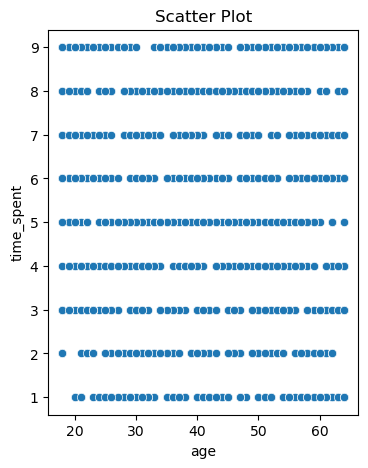

In [70]:
plt.figure(figsize=(4,5))
sns.scatterplot(data=df,x = 'age',y='time_spent')
plt.xlabel('age')
plt.ylabel('time_spent')
plt.title('Scatter Plot')
plt.show()

In [71]:
#line chart

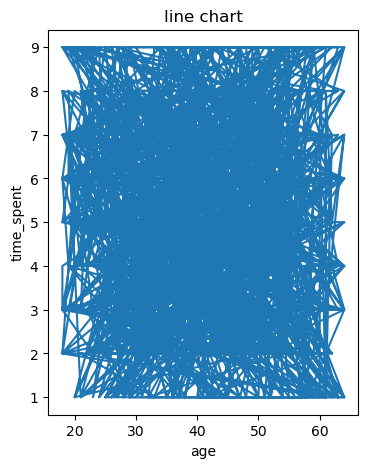

In [78]:
plt.figure(figsize=(4,5))
plt.plot(df['age'],df['time_spent'])
plt.xlabel('age')
plt.ylabel('time_spent')
plt.title('line chart')
plt.show()

In [79]:
#histogram remember plt.hist

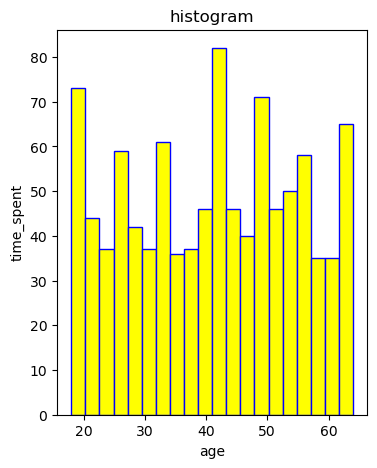

In [84]:
plt.figure(figsize=(4,5))
plt.hist(df['age'],bins=20,edgecolor='blue',color='yellow') 
plt.xlabel('age')
plt.ylabel('time_spent')
plt.title('histogram')
plt.show()

box plot   remember sns.boxplot

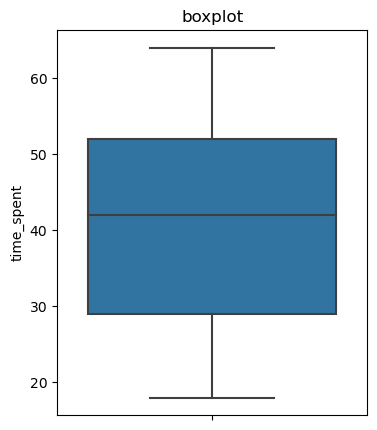

In [90]:
plt.figure(figsize=(4,5))
sns.boxplot(data=df,y='age') 
plt.ylabel('time_spent')
plt.title('boxplot')
plt.show()

3]examine the correlation betweeen variables using correlation matrices or scatter plots
corr matrix is table that displays corr coeff betwn all pairs of numeric variables in dataset

corr coeff(-1 to 1 range)


4]use hypothesis test

5]data analysis   
using various techniques techn to gain insights into underlying 
structure and relationships in the data
clustering,regression,classification